In [1]:
#  Deportista 1 "Pierna de Apoyo"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta de tu archivo
ruta = r"C:\Users\USUARIO\OneDrive\Desktop\Proyecto Biomecánica\00243_left.xlsm"

# Leer el archivo completo
df = pd.read_excel(ruta, header=None)

# Función para extraer un bloque
def extraer_bloque(df, col_t, col_x, col_y, nombre):
    bloque = df[[col_t, col_x, col_y]].copy()
    bloque.columns = ["Tiempo", "X", "Y"]
    # Eliminar filas que no contienen números
    bloque = bloque[pd.to_numeric(bloque["Tiempo"], errors="coerce").notna()]
    bloque["Tiempo"] = bloque["Tiempo"].astype(float)
    bloque["X"] = bloque["X"].astype(float)
    bloque["Y"] = bloque["Y"].astype(float)
    print(f"\nPreview de {nombre}:")
    display(bloque.head())
    return bloque

# Extraer cada segmento
pie = extraer_bloque(df, 0, 1, 2, "Pie")
muslo = extraer_bloque(df, 4, 5, 6, "Muslo")
pierna = extraer_bloque(df, 8, 9, 10, "Pierna")
cadera = extraer_bloque(df, 12, 13, 14, "Cadera")
sacro = extraer_bloque(df, 16, 17, 18, "Sacro")
tobillo = extraer_bloque(df, 20, 21, 22, "Tobillo")
rodilla = extraer_bloque(df, 24, 25, 26, "Rodilla")




Preview de Pie:


,Tiempo,X,Y
4,0.000000,-32.722794,6.649487
5,33.366665,-32.722733,6.649261
6,66.733330,-32.722725,6.648956
7,100.099998,-32.722992,6.648785
8,133.466660,-32.723545,6.648556



Preview de Muslo:


,Tiempo,X,Y
4,0.000000,-31.621231,16.044641
5,33.366665,-31.622368,16.045120
6,66.733330,-31.682934,16.106148
7,100.099998,-31.684586,16.167141
8,133.466660,-31.745884,16.229471



Preview de Pierna:


,Tiempo,X,Y
4,0.000000,-35.655121,11.650185
5,33.366665,-35.655342,11.650244
6,66.733330,-35.715897,11.650570
7,100.099998,-35.716255,11.650921
8,133.466660,-35.838181,11.712118



Preview de Cadera:


,Tiempo,X,Y
4,0.000000,-27.442064,18.268522
5,33.366665,-27.442984,18.269609
6,66.733330,-27.504238,18.331148
7,100.099998,-27.565554,18.452885
8,133.466660,-27.627607,18.576057



Preview de Sacro:


,Tiempo,X,Y
4,0.000000,-24.779264,21.213903
5,33.366665,-24.779474,21.214008
6,66.733330,-24.840370,21.275084
7,100.099998,-24.840662,21.336302
8,133.466660,-24.901886,21.458893



Preview de Tobillo:


,Tiempo,X,Y
4,0.000000,-27.827141,9.794493
5,33.366665,-27.826797,9.793381
6,66.733330,-27.826654,9.733246
7,100.099998,-27.826946,9.734251
8,133.466660,-27.887417,9.735043



Preview de Rodilla:


,Tiempo,X,Y
4,0.000000,-40.592075,14.205482
5,33.366665,-40.592529,14.205400
6,66.733330,-40.653156,14.205519
7,100.099998,-40.653454,14.205666
8,133.466660,-40.714687,14.266745


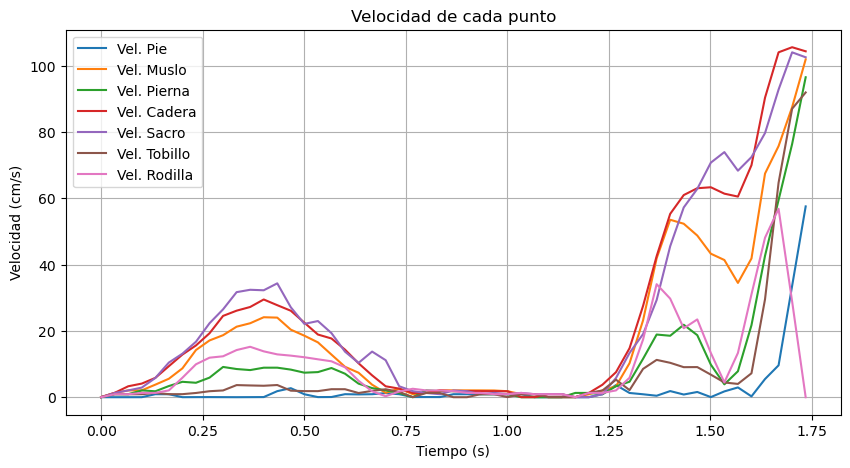

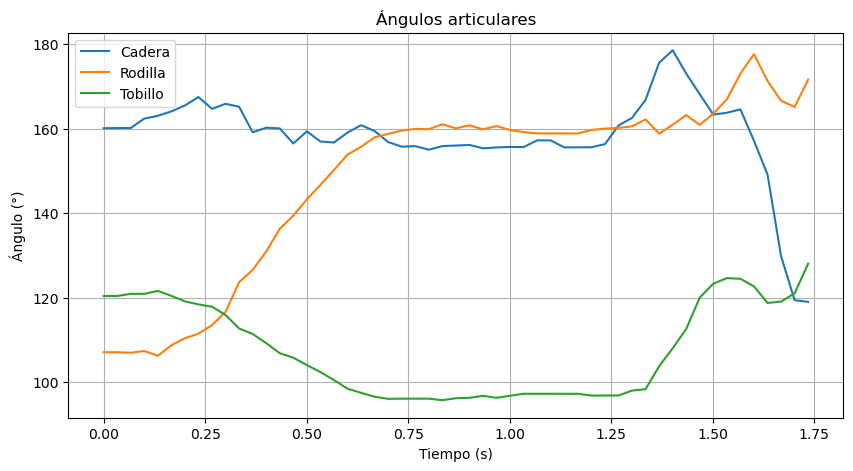


==== Pie ====
Velocidad total MAX: 57.546 cm/s
Velocidad total MIN: 0.000 cm/s
Velocidad en X MAX: 3.668 cm/s
Velocidad en X MIN: -49.495 cm/s
Velocidad en Y MAX: 29.357 cm/s
Velocidad en Y MIN: -1.792 cm/s

==== Muslo ====
Velocidad total MAX: 101.894 cm/s
Velocidad total MIN: 0.013 cm/s
Velocidad en X MAX: 4.575 cm/s
Velocidad en X MIN: -100.843 cm/s
Velocidad en Y MAX: 28.094 cm/s
Velocidad en Y MIN: -6.162 cm/s

==== Pierna ====
Velocidad total MAX: 96.493 cm/s
Velocidad total MIN: 0.005 cm/s
Velocidad en X MAX: 6.736 cm/s
Velocidad en X MIN: -95.375 cm/s
Velocidad en Y MAX: 42.248 cm/s
Velocidad en Y MIN: -10.645 cm/s

==== Cadera ====
Velocidad total MAX: 105.551 cm/s
Velocidad total MIN: 0.016 cm/s
Velocidad en X MAX: 1.578 cm/s
Velocidad en X MIN: -104.531 cm/s
Velocidad en Y MAX: 29.350 cm/s
Velocidad en Y MIN: -1.844 cm/s

==== Sacro ====
Velocidad total MAX: 104.010 cm/s
Velocidad total MIN: 0.007 cm/s
Velocidad en X MAX: 0.918 cm/s
Velocidad en X MIN: -102.697 cm/s
Velocid

In [2]:
def calcular_velocidad(segmento):
    x = segmento["X"].values
    y = segmento["Y"].values
    t = segmento["Tiempo"].values / 1000  # ms → s
    
    vx = np.gradient(x, t)
    vy = np.gradient(y, t)
    v = np.sqrt(vx**2 + vy**2)
    return vx, vy, v

vel_pie = calcular_velocidad(pie)
vel_muslo = calcular_velocidad(muslo)
vel_pier = calcular_velocidad(pierna)
vel_cad = calcular_velocidad(cadera)
vel_sacro = calcular_velocidad(sacro)
vel_tobi = calcular_velocidad(tobillo)
vel_rodi = calcular_velocidad(rodilla)


def angulo_3p(a, b, c):
    ba = a - b
    bc = c - b
    
    cos_ang = np.sum(ba * bc, axis=1) / (np.linalg.norm(ba, axis=1) * np.linalg.norm(bc, axis=1))
    ang = np.arccos(np.clip(cos_ang, -1, 1))
    return np.degrees(ang)

pie_xy = pie[["X","Y"]].values
pant_xy = pierna[["X","Y"]].values
muslo_xy = muslo[["X","Y"]].values
cadera_xy = cadera[["X","Y"]].values
sacro_xy = sacro[["X","Y"]].values

# Rodilla = Muslo - Rodilla(Pant) - Pie
angulo_rodilla = angulo_3p(muslo_xy, pant_xy, pie_xy)

# Cadera = Sacro - Cadera - Muslo
angulo_cadera = angulo_3p(sacro_xy, cadera_xy, muslo_xy)

# Tobillo = Pantorrilla - Pie - eje horizontal (vector auxiliar)
angulo_tobillo = angulo_3p(pant_xy, pie_xy, pie_xy + np.array([1,0]))

# =========================================
# Gráficas
# =========================================
tiempo_seg = pie["Tiempo"].values / 1000

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, vel_pie[2], label="Vel. Pie")
plt.plot(tiempo_seg, vel_muslo[2], label="Vel. Muslo")
plt.plot(tiempo_seg, vel_pier[2], label="Vel. Pierna")
plt.plot(tiempo_seg, vel_cad[2], label="Vel. Cadera")
plt.plot(tiempo_seg, vel_sacro[2], label="Vel. Sacro")
plt.plot(tiempo_seg, vel_tobi[2], label="Vel. Tobillo")
plt.plot(tiempo_seg, vel_rodi[2], label="Vel. Rodilla")
plt.legend()
plt.title("Velocidad de cada punto")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (cm/s)")
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, angulo_cadera, label="Cadera")
plt.plot(tiempo_seg, angulo_rodilla, label="Rodilla")
plt.plot(tiempo_seg, angulo_tobillo, label="Tobillo")
plt.legend()
plt.title("Ángulos articulares")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)")
plt.grid()
plt.show()

# =========================================
# Velocidades máximas y mínimas
# =========================================
def resumen_vel(nombre, vel):
    vx, vy, v = vel
    print(f"\n==== {nombre} ====")
    print(f"Velocidad total MAX: {np.max(v):.3f} cm/s")
    print(f"Velocidad total MIN: {np.min(v):.3f} cm/s")
    print(f"Velocidad en X MAX: {np.max(vx):.3f} cm/s")
    print(f"Velocidad en X MIN: {np.min(vx):.3f} cm/s")
    print(f"Velocidad en Y MAX: {np.max(vy):.3f} cm/s")
    print(f"Velocidad en Y MIN: {np.min(vy):.3f} cm/s")

resumen_vel("Pie", vel_pie)
resumen_vel("Muslo", vel_muslo)
resumen_vel("Pierna", vel_pier)
resumen_vel("Cadera", vel_cad)
resumen_vel("Sacro", vel_sacro)
resumen_vel("Tobillo", vel_tobi)
resumen_vel("Rodilla", vel_rodi)

# =========================================
# Ángulos máximos y mínimos
# =========================================
def resumen_ang(nombre, ang):
    print(f"\n==== Ángulo de {nombre} ====")
    print(f"Ángulo MAX: {np.max(ang):.3f} grados")
    print(f"Ángulo MIN: {np.min(ang):.3f} grados")

resumen_ang("Cadera", angulo_cadera)
resumen_ang("Rodilla", angulo_rodilla)
resumen_ang("Tobillo", angulo_tobillo)

